In [1]:
%display latex

# Basics

In [2]:
from sympy.stats import P, E, variance, Normal, density, cdf
import sympy

Define a standard normal variable:

In [3]:
Z = Normal('Z', 0, 1)
Z

Z

Compute the mean and variance:

In [4]:
E(Z)

0

In [5]:
variance(Z)

1

The probability $Z > 1.95$:

In [6]:
P(Z > 1.95).n(3)

0.0256

In [7]:
density(Z)

NormalDistribution(0, 1)

In [8]:
cdf(Z)

Lambda(_z, erf(sqrt(2)*_z/2)/2 + 1/2)

Try with symbolic:

In [9]:
m = sympy.Symbol(r'\mu')
m

\mu

In [10]:
A = Normal('A', m, 1)
A

A

In [11]:
E(A)

\mu

In [12]:
variance(A)

1

In [ ]:
P(A < 0.5)

-0.220624225646149*sqrt(2)*(1.0 - 2.0*\mu)*(0.353553390593274*pi*(1.0 - 2.0*\mu)*exp(0.5*(0.5 - \mu)**2)*erf(0.707106781186548*\mu - 0.353553390593274) - 0.353553390593274*pi*(1.0 - 2.0*\mu)*exp(0.5*(0.5 - \mu)**2))*exp(-\mu**2/2 + 0.5*\mu)/(pi*(0.5 - \mu)**2)

# Custom Random Variables

A custom continuos random variable with a given pdf and on the positive real line:

In [ ]:
from sympy.stats import ContinuousRV

In [ ]:
pdf = exp(-x)

Z = ContinuousRV(sympy.symbols('x'), pdf, set = sympy.Interval(0, oo))
Z

In [ ]:
E(Z)

In [ ]:
variance(Z)

To create a discrete random variable:

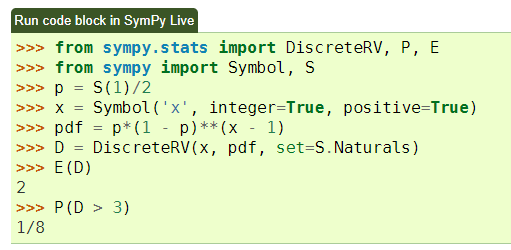

# Joint Random Variables

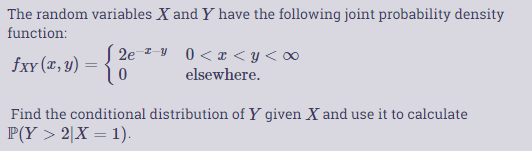

In [ ]:
# this is a bug/not implemented error
# see here: https://github.com/sympy/sympy/issues/20634

from sympy import Indexed, Piecewise, exp, Eq
from sympy.stats import JointRV

x1, x2 = (Indexed('x', i) for i in range(1,3))

pdf = Piecewise((2 * exp(-x1 - x2), (0 < x1) & (x1 < x2) & (x2 < 10)), (0, False))

X = JointRV('x', pdf)

P(X[1] > 2, Eq(X[0], 1))

# Maximum Likelihood Estimator

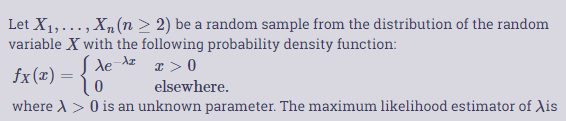

In [ ]:
l = var('l', latex_name = r'\lambda')
l

Assume 3 random variables:

In [ ]:
x1, x2, x3 = var('x1 x2 x3')

The pdf:

In [ ]:
f(x) = l * exp(-l*x)
f

The objective function:

In [ ]:
g(l) = f(x1) * f(x2) * f(x3)
g

Find the optimal $\lambda$:

In [ ]:
assume(l > 0)
(g(l).diff(l) == 0).solve(l)

# Hypothesis Testing

**Sample Question 1**

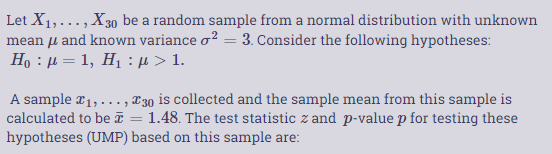

This is one-tailed test:

In [ ]:
n = 30
h0 = 1
v = 3 # variance

sample_mean = 1.48

The test statistic:

In [ ]:
z = (sample_mean - h0)/sqrt(v/n)
z

In [ ]:
z.n(digits=3)

The p-value:

In [ ]:
%%r
1 - pnorm(1.52)

**Sample Question 2**

From [here](https://www.statisticshowto.com/probability-and-statistics/hypothesis-testing/):
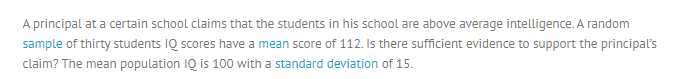

Still a one-tail test:

In [ ]:
n = 30
h0 = 100
v = 15^2 # variance

sample_mean = 112.5

In [ ]:
z = (sample_mean - h0)/sqrt(v/n)
z

In [ ]:
z.n(digits=3)

In [ ]:
%%r
1 - pnorm(4.38)

The rejection level i.e. $\alpha$ at 5%:

In [ ]:
%%r
qnorm(.95)

**Sample Question 3**

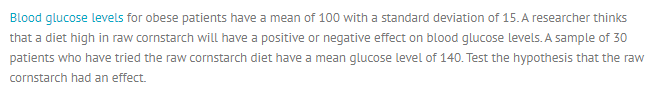

Two-tailed test:

In [ ]:
n = 30
h0 = 100
v = 15^2 # variance

sample_mean = 140

In [ ]:
z = (sample_mean - h0)/sqrt(v/n)
z
z.n(digits=3)

Rejection level at 5%:

In [ ]:
%%r
a <- (1 - 0.95)/2
c(qnorm(a), -qnorm(a))

# Confidence Interval

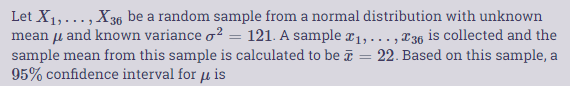

In [ ]:
%%r

# sample size
n <- 36

# sample mean
m <- 22

# sample var
v <- 121

# std error
e <- sqrt(v/n)

# critical points i.e. the alpha
# at 95% CI
a <- (1 - 0.95)/2

a <- abs(qnorm(a))


c(m - a * e, m + a * e)

# Linear Regression

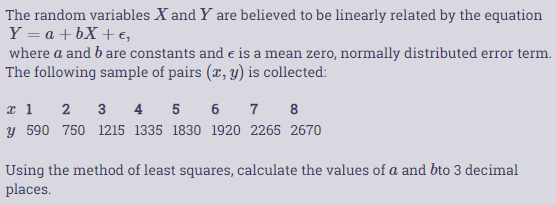

In [ ]:
%%r

x <- c(1, 2, 3, 4, 5, 6, 7, 8)
y <- c(590, 750, 1215, 1335, 1830, 1920, 2265, 2670)

m <- lm(y ~ x)
summary(m)